Import required libs


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\mdame\AppData\Local\Temp\ipykernel_13212\3551969598.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('phoneriskDataset.csv')
data

,age,gender,Mobile Phone risk rating,blue collar or white collar,Doing Sports,education,Vacations,phone price
0,73,Male,7,0,0,Doctoral degree,5,1
1,38,Female,10,1,1,High school diploma or equivalent,6,1
2,33,Female,6,0,1,High school diploma or equivalent,7,0
3,68,Female,1,0,1,High school diploma or equivalent,0,0
4,53,Female,7,1,0,Associate degree,7,1
...,...,...,...,...,...,...,...,...
9995,71,Female,9,0,1,"Some college, no degree",5,1
9996,71,Male,4,0,0,Bachelor’s degree,7,0
9997,25,Male,6,0,1,Master’s degree,3,1
9998,70,Female,4,1,1,Master’s degree,4,0


Splits data into target and training x,y

In [3]:
from sklearn.model_selection import train_test_split

x = data.drop(['Mobile Phone risk rating'],axis=1)
y = data['Mobile Phone risk rating']

In [4]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2)

In [5]:
train_data = x_train.join(y_train)

In [6]:
train_data['gender'] = train_data['gender'].replace(['Female','Male'],[0,1])
train_data['education'] = train_data['education'].replace(['Associate degree','High school diploma or equivalent','Some college, no degree','Less than high school','Bachelor’s degree','Doctoral degree','Master’s degree'],
[1,0,0,0,1,1,1])

C:\Users\mdame\AppData\Local\Temp\ipykernel_13212\1216302570.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['gender'] = train_data['gender'].replace(['Female','Male'],[0,1])
C:\Users\mdame\AppData\Local\Temp\ipykernel_13212\1216302570.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['education'] = train_data['education'].replace(['Associate degree','High school diploma or equivalent','Some college, no degree','Less than high school','Bachelor’s degree','Doctoral degree','Master’s degree'],


In [7]:
train_data['education']

4767    1
5961    0
2871    0
1862    0
1914    1
       ..
2156    1
7104    0
8984    1
1742    1
9753    0
Name: education, Length: 8000, dtype: int64

<Axes: >

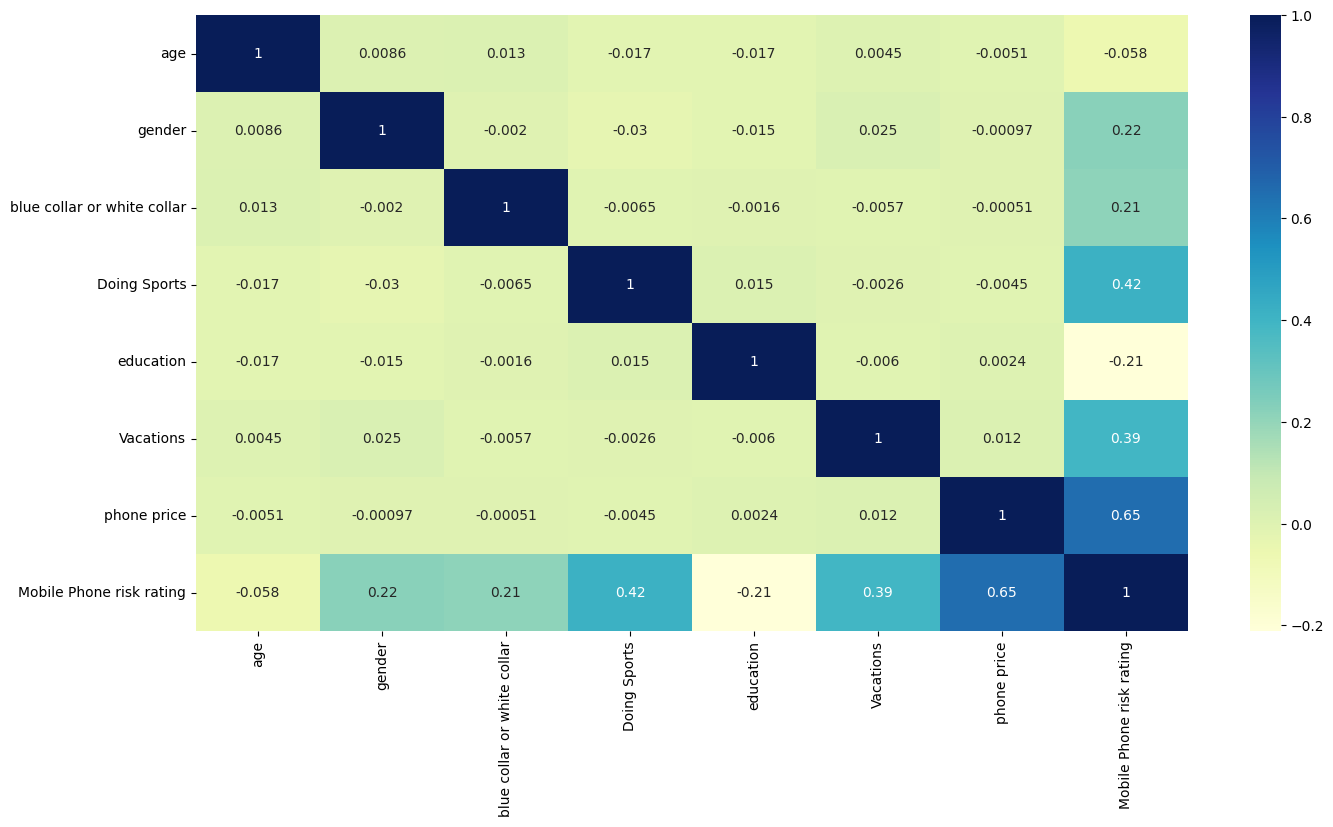

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = train_data.drop(['Mobile Phone risk rating'],axis=1)
y_train = train_data['Mobile Phone risk rating']
test_data = x_test.join(y_test)
test_data['gender'] = test_data['gender'].replace(['Female','Male'],[0,1])
#test_data = test_data.join(pd.get_dummies(test_data.education)).drop(['education'], axis=1)
test_data['education'] = test_data['education'].replace(['Associate degree','High school diploma or equivalent','Some college, no degree','Less than high school','Bachelor’s degree','Doctoral degree','Master’s degree'],
[1,0,0,0,1,1,1])
x_test = test_data.drop(['Mobile Phone risk rating'],axis=1)
y_test = test_data['Mobile Phone risk rating']
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


C:\Users\mdame\AppData\Local\Temp\ipykernel_13212\1139893110.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['gender'] = test_data['gender'].replace(['Female','Male'],[0,1])
C:\Users\mdame\AppData\Local\Temp\ipykernel_13212\1139893110.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['education'] = test_data['education'].replace(['Associate degree','High school diploma or equivalent','Some college, no degree','Less than high school','Bachelor’s degree','Doctoral degree','Master’s degree'],


In [10]:
from sklearn.ensemble import *

booster = GradientBoostingRegressor()

forest = RandomForestRegressor()

forest.fit(x_train,y_train)
print(f"forest:{forest.score(x_test,y_test)}")
booster.fit(x_train,y_train)
print(f"Gradient {booster.score(x_test,y_test)}")

forest:0.9254038994190098
Gradient 0.943612488663541


tuning the params

In [11]:
from sklearn.model_selection import GridSearchCV

gradient = GradientBoostingRegressor()

param_grid = {
    "min_samples_split":[415,420,425],
    "n_estimators":[142,145,150]
}

grid = GridSearchCV(gradient, param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'min_samples_split': [415, 420, 425],
                         'n_estimators': [142, 145, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [12]:

best_grid = grid.best_estimator_
grid.best_estimator_

GradientBoostingRegressor(min_samples_split=415, n_estimators=142)

In [13]:
best_grid.score(x_test,y_test)

0.9434272070204275

save model


In [14]:
import joblib
joblib.dump(best_grid,'model.joblib')

['model.joblib']